In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('DiwaliSalesData.csv',encoding='unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
User_ID             11251 non-null int64
Cust_name           11251 non-null object
Product_ID          11251 non-null object
Gender              11251 non-null object
Age Group           11251 non-null object
Age                 11251 non-null int64
Marital_Status      11251 non-null int64
State               11251 non-null object
Zone                11251 non-null object
Occupation          11251 non-null object
Product_Category    11251 non-null object
Orders              11251 non-null int64
Amount              11239 non-null float64
Status              0 non-null float64
unnamed1            0 non-null float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [8]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df['Amount']=df['Amount'].astype(int)

In [11]:
df['Amount'].dtypes

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df.rename(columns={'Marital_Status':'shaadi'})   # renaming purpose if necessary

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799
10,1003829,Harshita,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770


In [14]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

# Gender

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

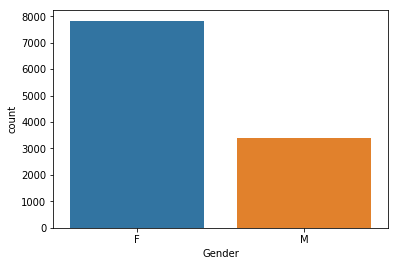

In [15]:
p1=sns.countplot(x='Gender',data=df)

for x in p1.containers:
    p1.bar_label(x)

In [24]:
gend=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
gend

,Gender,Amount
0,F,74335853
1,M,31913276


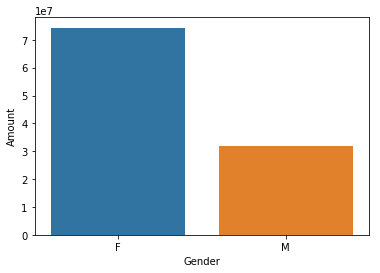

In [25]:
sns.barplot(x='Gender',y='Amount',data=gend)

It is clear that most of the buyers are females

# Age

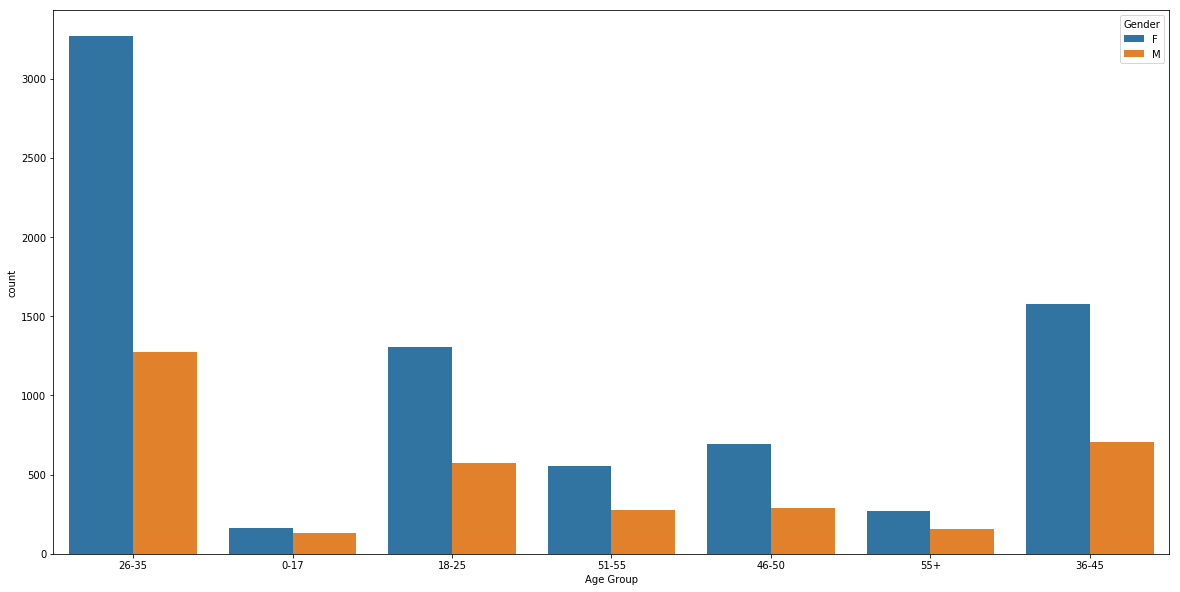

In [37]:
plt.figure(figsize=(20,10))
p2=sns.countplot(x='Age Group',data=df,hue='Gender')

In [ ]:
for i in p2.containers:
    p2.bar_label(i)

In [40]:
age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


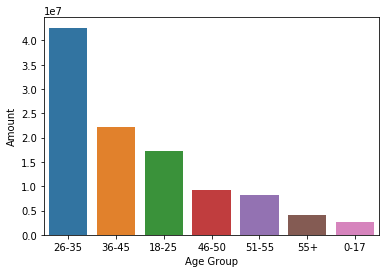

In [41]:
sns.barplot(x='Age Group',y='Amount',data=age)

Now, it is clear that most of the buyers are in the '26-35 years old Female' category.

# state

In [46]:
state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


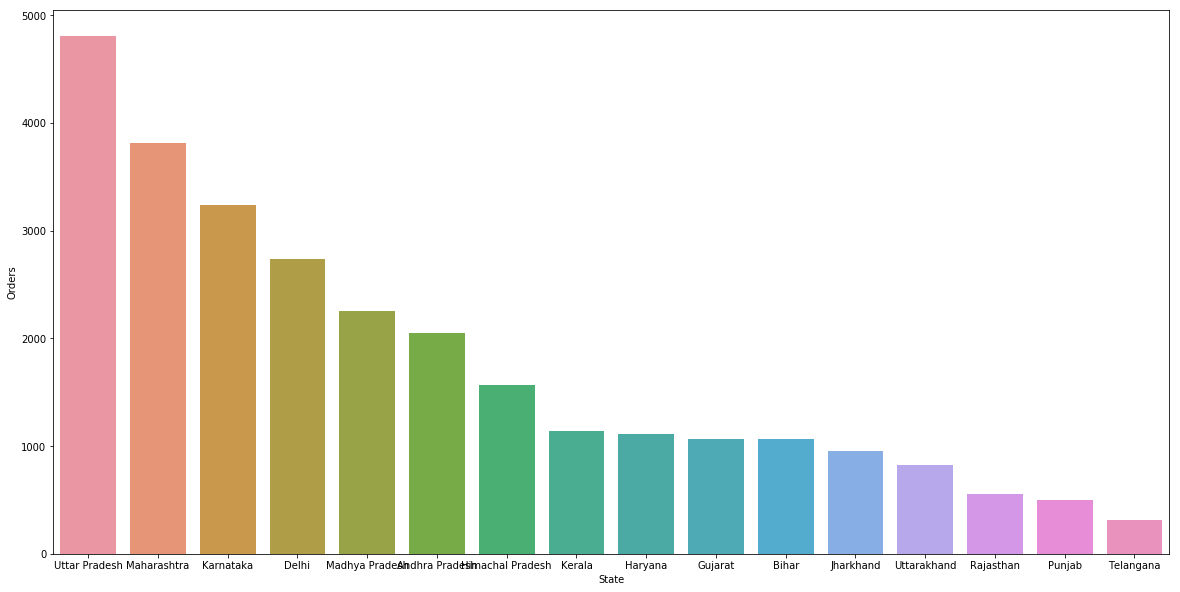

In [49]:
plt.figure(figsize=(20,10))
sns.barplot(x='State',y='Orders',data=state)

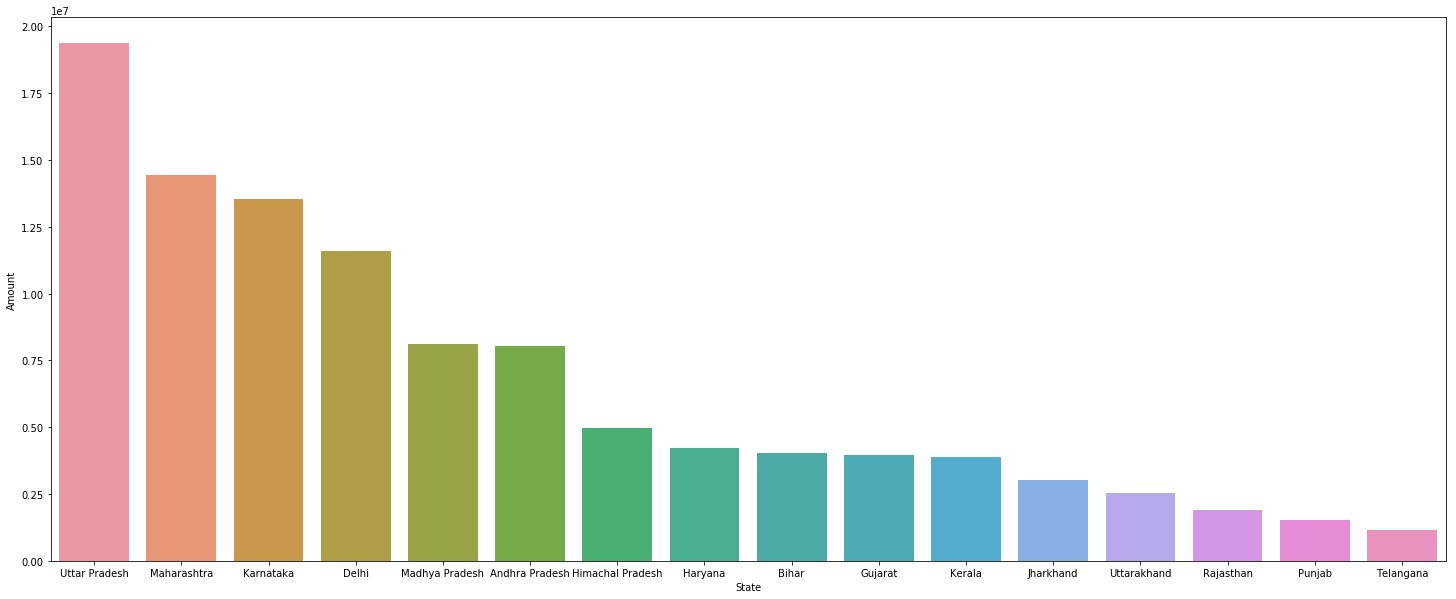

In [51]:
state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(x='State',y='Amount',data=state)

Most of the orders are from UP,Maharashtra and Karnataka

# Marital status

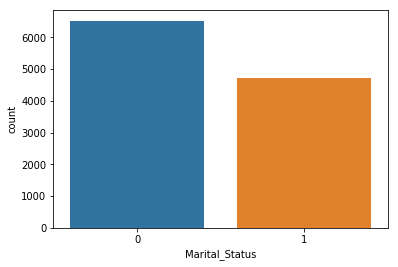

In [58]:
sns.countplot(x='Marital_Status',data=df)

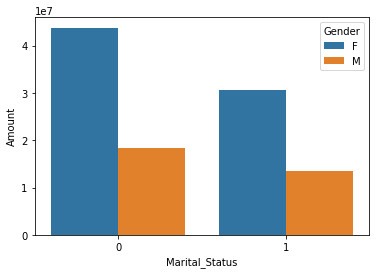

In [59]:
state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Marital_Status',y='Amount',data=state,hue='Gender')

Unmarried women are the major purchasers.

# Occupation

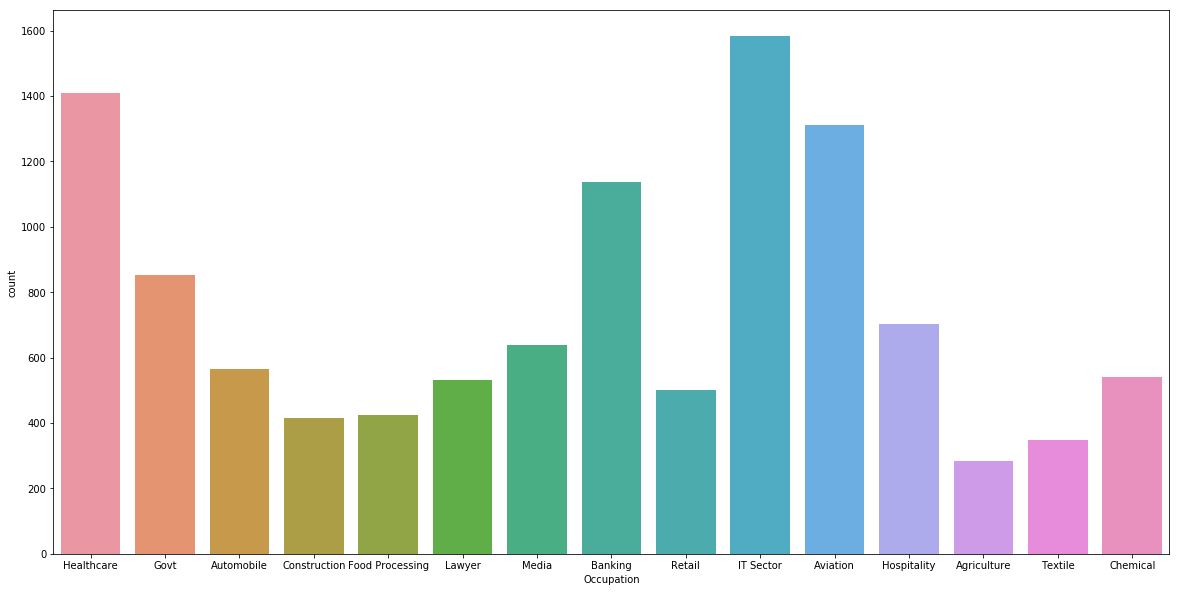

In [61]:
plt.figure(figsize=(20,10))
sns.countplot(x='Occupation',data=df)

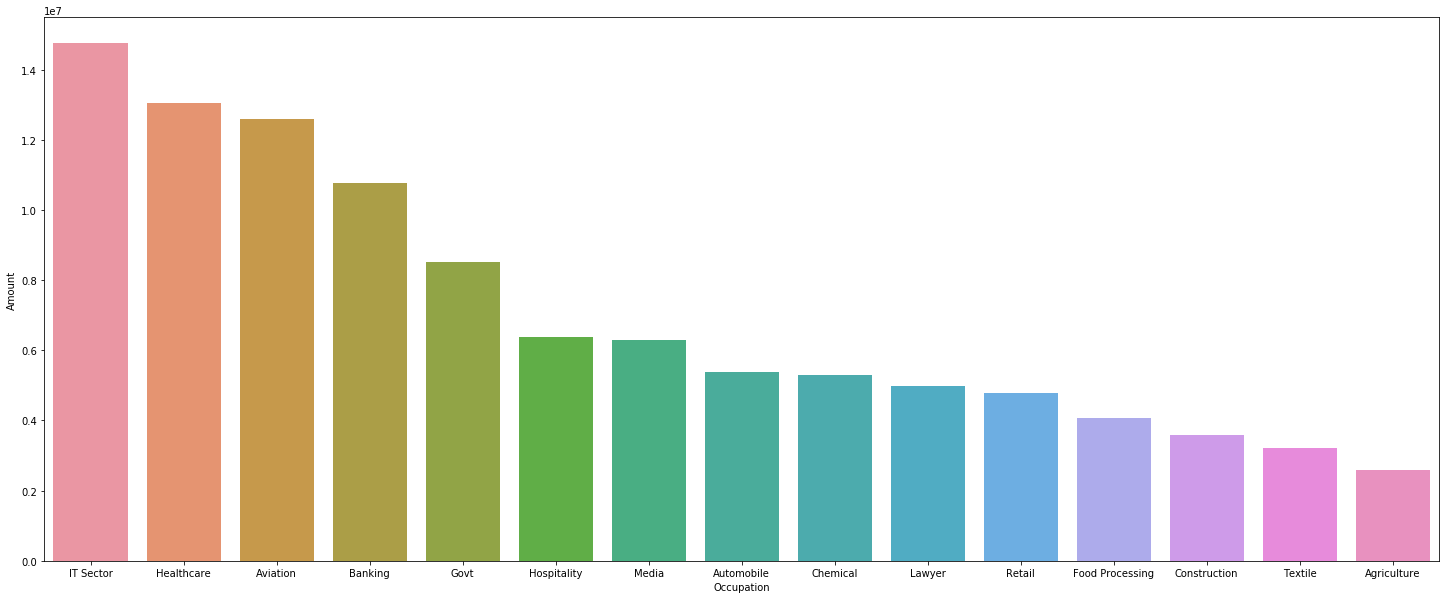

In [62]:
state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(x='Occupation',y='Amount',data=state)

Most of the buyers are from IT,healthcare and aviation

# Category

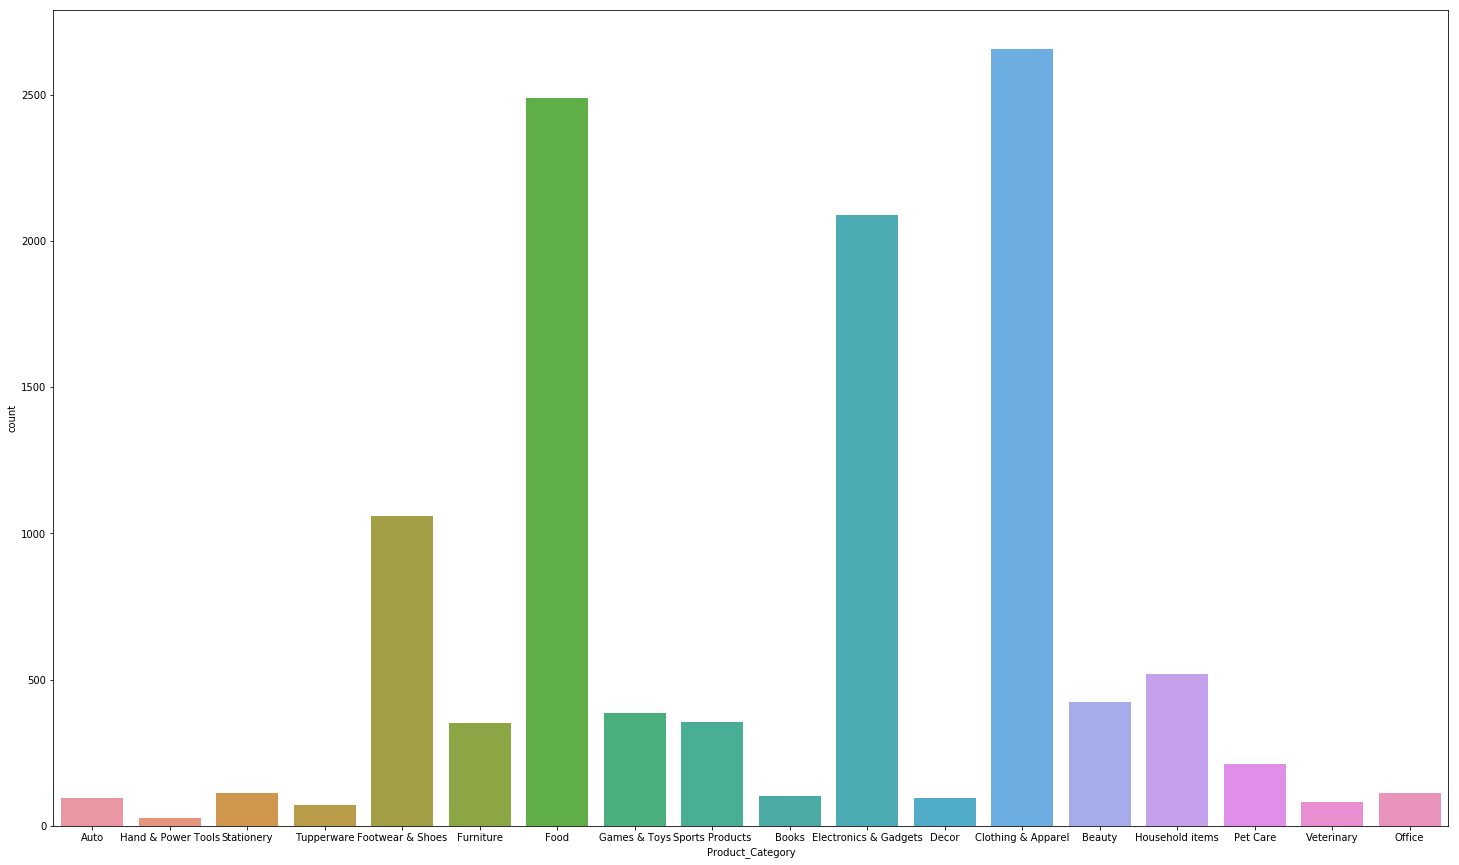

In [68]:
plt.figure(figsize=(25,15))
sns.countplot(x='Product_Category',data=df)

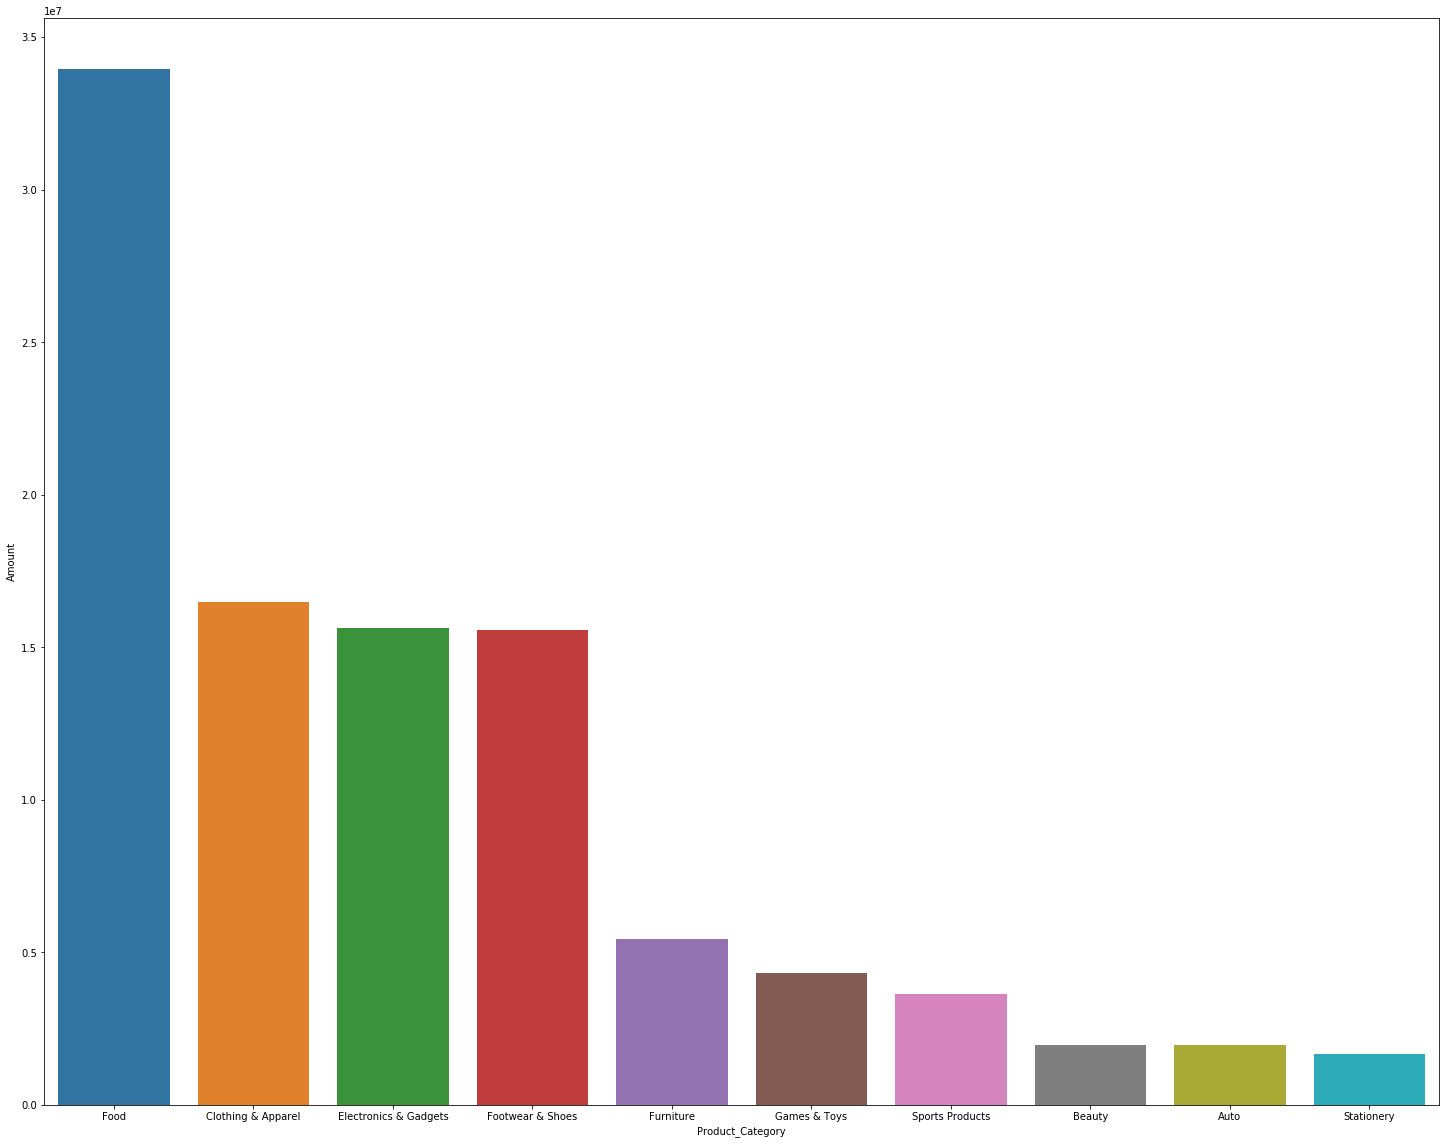

In [71]:
state=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(25,20))
sns.barplot(x='Product_Category',y='Amount',data=state)

Most purchased categories are Food,Clothing and electronics

# Conclusion

Unmarried women in the age group 26-25 yrs from UP,Maharashtra and Karnataka working in the IT,Healthcare and aviation sector are more likey to purchase products from Food,clothing and electronics categories.